# CEN426 - Introduction to MAchine Learning Task 7
---
The student must use Radial Basis Function Neural Network to classify three sample datasets, then interpret the results by comparing them.

### Student Name: Furkan Çetinkaya
### Student ID: 2016556017

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.layers import Dense, Flatten, InputLayer
from tensorflow.keras.models import Sequential
from sklearn.model_selection import KFold
from RBFLayer import RBFLayer          # Radial Basis Function Neural Network için hazır keras layer'ı
import matplotlib.pyplot as plt
%matplotlib inline

## Helper Functions

In [2]:
def RBF_Model(X):
    rbfModel = Sequential()
    rbfModel.add(InputLayer(input_shape=(X.shape[1])))
    rbfModel.add(RBFLayer(10, 0.5))
    rbfModel.add(Dense(1, activation='sigmoid', name='foo'))
    return rbfModel

In [3]:
def plot_result(foldIdx, history):
    fig, ax = plt.subplots()
    ax.plot([1,2,3], history.history['loss'], label='Loss', marker="^", markersize=10)
    ax.plot([1,2,3], history.history['accuracy'], label='Accuracy', marker="s", markersize=10)
    plt.xticks([1,2,3], ["Epoch 1", "Epoch 2", "Epoch 3"], rotation='vertical')
    plt.margins(0.2)
    plt.subplots_adjust(bottom=0.15)
    ax.set_title(f"Fold {foldIdx} Results")
    ax.legend()

In [4]:
kfold = KFold(2)

## 1st Dataset

In [5]:
df = pd.read_csv('pima-indians-diabetes.csv', header=None).sample(frac=1)
df.columns = ['col1', 'col2', 'col3', 'col4', 'col5', 'col6', 'col7', 'col8', 'label']
y = df['label']
X = df.drop('label', axis=1)
X = X

----------------
Fold Number: 1
----------------
Input Shape: (None, 8)
Units      : 10
Epoch 1/3
2/2 - 1s - loss: 0.6930 - accuracy: 0.6797
Epoch 2/3
2/2 - 0s - loss: 0.6921 - accuracy: 0.6797
Epoch 3/3
2/2 - 0s - loss: 0.6915 - accuracy: 0.6797
2/2 - 0s - loss: 0.6917 - accuracy: 0.6224
----------------
Fold Number: 2
----------------
Input Shape: (None, 8)
Units      : 10
Epoch 1/3
2/2 - 1s - loss: 0.6930 - accuracy: 0.6224
Epoch 2/3
2/2 - 0s - loss: 0.6924 - accuracy: 0.6224
Epoch 3/3
2/2 - 0s - loss: 0.6920 - accuracy: 0.6224
2/2 - 0s - loss: 0.6910 - accuracy: 0.6797


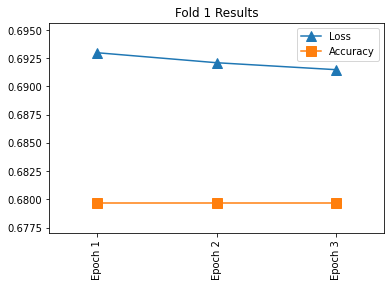

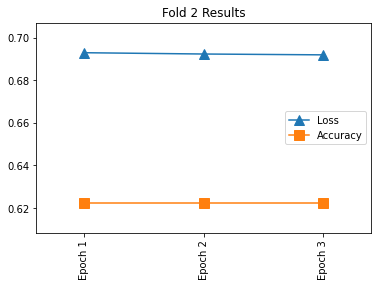

In [6]:
foldIdx = 1
for tridx, tsidx in kfold.split(X):
    X_train, X_test = X.iloc[tridx], X.iloc[tsidx]
    y_train, y_test = y[tridx], y[tsidx]
    print("----------------")
    print(f"Fold Number: {foldIdx}")
    print("----------------")
    rbfModel = RBF_Model(X)
    rbfModel.compile(optimizer='rmsprop', loss=binary_crossentropy, metrics=["accuracy"])
    history = rbfModel.fit(X_train, y_train, batch_size=256, epochs=3, verbose=2)
    result = rbfModel.evaluate(X_test, y_test, batch_size=256, verbose=2)
    plot_result(foldIdx, history)
    foldIdx += 1

## 2nd Dataset

In [7]:
X = np.load('kmnist-train-imgs.npz')['arr_0']
y = np.load('kmnist-train-labels.npz')['arr_0']
y = (y <= 25).astype(int)
X = X.reshape(-1, X.shape[1]*X.shape[2])
X = X / 255

----------------
Fold Number: 1
----------------
Input Shape: (None, 784)
Units      : 10
Epoch 1/3
235/235 - 4s - loss: 0.6331 - accuracy: 0.9957
Epoch 2/3
235/235 - 3s - loss: 0.5302 - accuracy: 1.0000
Epoch 3/3
235/235 - 3s - loss: 0.4405 - accuracy: 1.0000
118/118 - 1s - loss: 0.3997 - accuracy: 1.0000
----------------
Fold Number: 2
----------------
Input Shape: (None, 784)
Units      : 10
Epoch 1/3
235/235 - 3s - loss: 0.6331 - accuracy: 0.9957
Epoch 2/3
235/235 - 3s - loss: 0.5302 - accuracy: 1.0000
Epoch 3/3
235/235 - 3s - loss: 0.4405 - accuracy: 1.0000
118/118 - 1s - loss: 0.3997 - accuracy: 1.0000


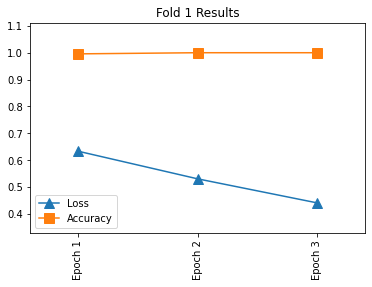

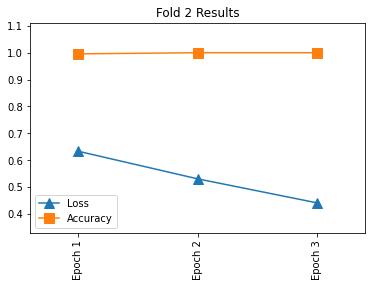

In [8]:
foldIdx = 1
for tridx, tsidx in kfold.split(X):
    X_train, X_test = X[tridx], X[tsidx]
    y_train, y_test = y[tridx], y[tsidx]
    print("----------------")
    print(f"Fold Number: {foldIdx}")
    print("----------------")
    rbfModel = RBF_Model(X)
    rbfModel.compile(optimizer='rmsprop', loss=binary_crossentropy, metrics=["accuracy"])
    history = rbfModel.fit(X, y, batch_size=256, epochs=3, verbose=2)
    result = rbfModel.evaluate(X_test, y_test, batch_size=256, verbose=2)
    plot_result(foldIdx, history)
    foldIdx += 1

## 3rd Dataset

In [9]:
df = pd.read_csv('new_test.csv').sample(frac=1)
y = df['poutcome']
X = df.drop('poutcome', axis=1)
X = X

----------------
Fold Number: 1
----------------
Input Shape: (None, 12)
Units      : 10
Epoch 1/3
33/33 - 1s - loss: 0.6834 - accuracy: 0.8445
Epoch 2/3
33/33 - 0s - loss: 0.6687 - accuracy: 0.8676
Epoch 3/3
33/33 - 0s - loss: 0.6552 - accuracy: 0.8676
17/17 - 0s - loss: 0.6486 - accuracy: 0.8653
----------------
Fold Number: 2
----------------
Input Shape: (None, 12)
Units      : 10
Epoch 1/3
33/33 - 1s - loss: 0.6834 - accuracy: 0.8418
Epoch 2/3
33/33 - 0s - loss: 0.6688 - accuracy: 0.8676
Epoch 3/3
33/33 - 0s - loss: 0.6552 - accuracy: 0.8676
17/17 - 0s - loss: 0.6476 - accuracy: 0.8699


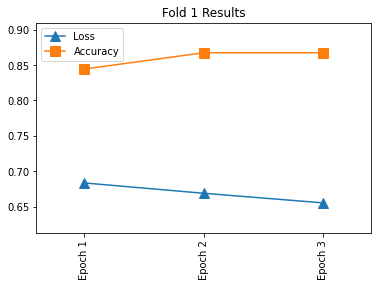

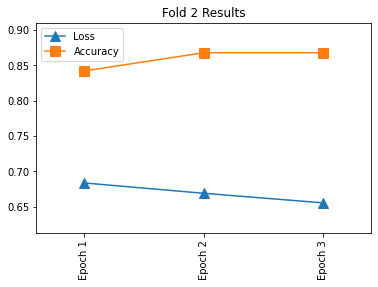

In [10]:
foldIdx = 1
for tridx, tsidx in kfold.split(X):
    X_train, X_test = X.iloc[tridx], X.iloc[tsidx]
    y_train, y_test = y[tridx], y[tsidx]
    print("----------------")
    print(f"Fold Number: {foldIdx}")
    print("----------------")
    rbfModel = RBF_Model(X)
    rbfModel.compile(optimizer='rmsprop', loss=binary_crossentropy, metrics=["accuracy"])
    history = rbfModel.fit(X, y, batch_size=256, epochs=3, verbose=2)
    result = rbfModel.evaluate(X_test, y_test, batch_size=256, verbose=2)
    plot_result(foldIdx, history)
    foldIdx += 1